# Imports

In [1]:


import sys
import os
import datetime
import time
import random
import re
import json
import csv
import pandas as pd
import collections
import matplotlib.font_manager as font_manager
import natsort as ns
import networkx as nx
import glob

import numpy as np
import matplotlib as mpl

DEFAULT_FIGURE_SIZE = 0.9



#labels = ['Manaul', 'PAPI']
#traffic = [12.46, 18.75]

# Function to calculate figure size in LaTeX document
def figsize(scale=DEFAULT_FIGURE_SIZE, extra_width=0.0, extra_height=0.0):
    """Determine a good size for the figure given a scale."""
    fig_width_pt = 469.755  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27  # Convert pt to inch
    # Aesthetic ratio (you could change this)
    golden_mean = (np.sqrt(5.0) - 1.0) / 2.0
    if scale < 0.7:
        golden_mean *= 1.2
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean  # height in inches
    fig_size = [fig_width + extra_width, fig_height + extra_height]
    return fig_size

figcount = 1
def figsave(file, include_count=False, data=None):
    global figcount
    if not os.path.exists('figs'):
        os.makedirs('figs')
    if include_count:
        file = f'figs/{figcount:02}_{file}'
        figcount += 1
    else:
        file = f'figs/{file}'
    plt.tight_layout()
    plt.savefig(file + '.svg')
    plt.savefig(file + '.pdf')
    if data is not None:
        data.to_csv(file + '.csv')
        
tblcount = 1
def tblsave(file, data, include_count=False):
    global tblcount
    if not os.path.exists('tables'):
        os.makedirs('tables')
    if include_count:
        file = f'tables/{tblcount:02}_{file}.tex'
        tblcount += 1
    else:
        file = f'tables/{file}.tex'
    with open(file, 'w') as fp:
        fp.write(data.to_latex())

# pgf settings for use in LaTeX
latex = {  # setup matplotlib to use latex for output
    "font.family": "serif",
    # "axes.labelsize":  10,
    # "font.size":       10,
    # "legend.fontsize": 10,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
}
mpl.rcParams.update(latex)
# print(mpl.rcParams.find_all)
import matplotlib.pyplot as plt
import math
import seaborn as sns

from tabulate import tabulate
pd.options.display.max_columns = None
pd.options.display.max_rows = None

title_size = 16

# %matplotlib inline
# %matplotlib notebook



# Read in data

In [2]:

colnames=['app', 'type', 'data'] 

#user1 = pd.read_csv('dataset/1.csv', names=colnames, header=None, skipinitialspace=True)

#data = pd.read_csv('Stats_1Core.txt', names=colnames, header=None, skipinitialspace=True, delimiter=r"\s+")
#data = pd.read_csv('Stats_1Core.txt', delim_whitespace=True)
#data = pd.read_csv("Stats_1Core.txt", header=None, delimiter=r"\s+", skipinitialspace=True)
df = pd.read_csv("Stats_1Core.txt", names=colnames, skipinitialspace=True, header=None, sep=":")

#df_user_key_word_org = pd.read_csv("Stats_1Core.txt",
#                                   sep="\s+|;|:|_", skipinitialspace=True, header=None,index_col = False, engine="python",)
                                   #names=my_cols, 
                                   #header=None, 
                                   #engine="python")


print(df.dtypes) 
#display(df)
df= df[~df['app'].str.contains('==')]
df= df[~df['app'].str.contains('jacobi')]
df= df[~df['app'].str.contains('laplace')]
display(df)
#df= df[df['type'].str.contains('Instruc')]

#display(df['data'])



app      object
type     object
data    float64
dtype: object


,app,type,data
4,lulesh_host_1.txt,Instructions,1.000002e+09
5,lulesh_pim_1.txt,Instructions,1.000009e+09
6,pathfinder_host_1.txt,Instructions,2.000001e+09
7,pathfinder_pim_1.txt,Instructions,1.000008e+09
8,rsbench_host_1.txt,Instructions,1.000000e+09
9,rsbench_pim_1.txt,Instructions,1.000010e+09
10,simplemoc_host_1.txt,Instructions,1.000001e+09
11,simplemoc_pim_1.txt,Instructions,1.000004e+09
12,xsbench_host_1.txt,Instructions,1.000000e+09
13,xsbench_pim_1.txt,Instructions,1.000007e+09


# MPKI graph data processing

In [3]:

new_df= df[df['type'].str.contains('MPKI')]

display(new_df)

host= new_df[new_df['app'].str.contains('host')]
pim= new_df[new_df['app'].str.contains('pim')]
display(host)
display(pim)

app_name = host['app'].str.split('_', expand=True)
display(app_name)


app = app_name[0]
host_array = host['data']
pim_array = pim['data']
print (app)
print (host_array)
print (pim_array)




,app,type,data
49,lulesh_host_1.txt,L3 MPKI,0.019311
50,lulesh_pim_1.txt,L3 MPKI,0.000000
51,pathfinder_host_1.txt,L3 MPKI,0.021098
52,pathfinder_pim_1.txt,L3 MPKI,0.000000
53,rsbench_host_1.txt,L3 MPKI,0.080187
54,rsbench_pim_1.txt,L3 MPKI,0.000000
55,simplemoc_host_1.txt,L3 MPKI,0.537833
56,simplemoc_pim_1.txt,L3 MPKI,0.000000
57,xsbench_host_1.txt,L3 MPKI,5.395257
58,xsbench_pim_1.txt,L3 MPKI,0.000000


,app,type,data
49,lulesh_host_1.txt,L3 MPKI,0.019311
51,pathfinder_host_1.txt,L3 MPKI,0.021098
53,rsbench_host_1.txt,L3 MPKI,0.080187
55,simplemoc_host_1.txt,L3 MPKI,0.537833
57,xsbench_host_1.txt,L3 MPKI,5.395257


,app,type,data
50,lulesh_pim_1.txt,L3 MPKI,0.0
52,pathfinder_pim_1.txt,L3 MPKI,0.0
54,rsbench_pim_1.txt,L3 MPKI,0.0
56,simplemoc_pim_1.txt,L3 MPKI,0.0
58,xsbench_pim_1.txt,L3 MPKI,0.0


,0,1,2
49,lulesh,host,1.txt
51,pathfinder,host,1.txt
53,rsbench,host,1.txt
55,simplemoc,host,1.txt
57,xsbench,host,1.txt


49        lulesh
51    pathfinder
53       rsbench
55     simplemoc
57       xsbench
Name: 0, dtype: object
49    0.019311
51    0.021098
53    0.080187
55    0.537833
57    5.395257
Name: data, dtype: float64
50    0.0
52    0.0
54    0.0
56    0.0
58    0.0
Name: data, dtype: float64


# MPKI graph creation

49        lulesh
51    pathfinder
53       rsbench
55     simplemoc
57       xsbench
Name: 0, dtype: object


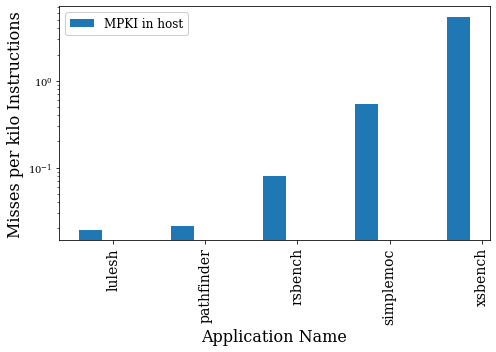

In [4]:
print(app)



#------------------------------ Data processing done

import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import matplotlib.patches as mpatches



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos] + 0.05, height + 3,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize=12, rotation=90)



def average(lst):
    return sum(lst) / len(lst)



#plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)



barwidth=.25



x_pos = np.arange(len(app))  # the label locations
barwidth=.25
#barwidth=.15


# Set position of bar on X axis
r1 = np.arange(len(app))
r2 = [x + barwidth for x in r1]
#r3 = [x + barwidth for x in r2]
#r4 = [x + barwidth for x in r3]
#r5 = [x + barwidth for x in r4]

#ax.barh(x_pos, read, hatch='....', color='white', edgecolor='black')
#rects1 = plt.bar(x, traffic, .8, hatch='....', color='white', edgecolor='black')
#rects1=ax.bar(r1, t_8, width=barwidth, hatch='...', color='white', edgecolor='black', label="Tile-8x8")
#rects2=ax.bar(r2, t_16, width=barwidth, hatch='**', color='white', edgecolor='black', label="Tile-16x16")
#rects3=ax.bar(r3, t_32, width=barwidth, hatch='oo', color='cornflowerblue', edgecolor='black', label="Tile-32x32")
#rects4=ax.bar(r4, t_64, width=barwidth, hatch='uu', color='cornflowerblue', edgecolor='black', label="Tile-64x64")

rects1=ax.bar(r1, host_array, width=barwidth,  label="MPKI in host")
#rects2=ax.bar(r2, pim_ipc, width=barwidth,  label="PIM")

#rects3=ax.bar(r3, t_16, width=barwidth,  label="Tile-16x16")
#rects4=ax.bar(r4, t_32, width=barwidth, label="Tile-32x32")
#rects5=ax.bar(r5, t_64, width=barwidth, color='cornflowerblue', label="Tile-64x64")
#rects2=ax.bar(r2, lit, width=barwidth, hatch='///', color='cornflowerblue', edgecolor='black', label="MAPredict_Corrected")

plt.legend(loc="upper left", handlelength=2, fontsize=12, ncol=2, framealpha=1)

#plt.legend(loc="upper right", fontsize=12)


ax.set_ylabel('Misses per kilo Instructions', fontsize=16)
ax.set_xlabel('Application Name', fontsize=16)

plt.yticks(np.arange(0, max(host_array)+ .5, 1))
#ax.set_ylim(ymin=.5)

#plt.yticks(np.arange(0, max(mapr)+90, 20), color="white")

#ax.set_yticklabels()


#plt.title('', fontsize=18)
#ax.set_xticks(x_pos)

#plt.yticks(fontsize=14)
#ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.xticks([r + barwidth for r in range(len(app))], app, fontsize=14, rotation=90)
#plt.xticks([r + barwidth for r in range(len(mapr))], matrix, fontsize=14, rotation=0)
#plt.xticks([r + barwidth for r in range(len(mapr))], stride, fontsize=14, rotation=90)

#plt.xticks(rotation=45, fontsize=14)

#ax.set_xticklabels(stride, fontsize=12)

#autolabel(rects1, "center")
#autolabel(rects2, "center")
#autolabel(rects3, "center")
#autolabel(rects4, "center")

ax.set_yscale('log')
#ax.set_ylim(1e-1, 1e3)

#ax.invert_yaxis()
plt.tight_layout()

plt.show()
fig.savefig('../figures/mpki.png', dpi=100)





# IPC graph data processing

In [5]:

new_df= df[df['type'].str.contains('IPC')]

display(new_df)

host= new_df[new_df['app'].str.contains('host')]
pim= new_df[new_df['app'].str.contains('pim')]
display(host)
display(pim)

app_name = host['app'].str.split('_', expand=True)
display(app_name)


app = app_name[0]
host_array = host['data'].to_numpy()
pim_array = pim['data'].to_numpy()
print (app)
print (host_array)
print (pim_array)


,app,type,data
34,lulesh_host_1.txt,IPC,1.701120
35,lulesh_pim_1.txt,IPC,1.451218
36,pathfinder_host_1.txt,IPC,2.173031
37,pathfinder_pim_1.txt,IPC,0.957685
38,rsbench_host_1.txt,IPC,1.525951
39,rsbench_pim_1.txt,IPC,1.437662
40,simplemoc_host_1.txt,IPC,1.849301
41,simplemoc_pim_1.txt,IPC,1.889328
42,xsbench_host_1.txt,IPC,0.938315
43,xsbench_pim_1.txt,IPC,1.082114


,app,type,data
34,lulesh_host_1.txt,IPC,1.701120
36,pathfinder_host_1.txt,IPC,2.173031
38,rsbench_host_1.txt,IPC,1.525951
40,simplemoc_host_1.txt,IPC,1.849301
42,xsbench_host_1.txt,IPC,0.938315


,app,type,data
35,lulesh_pim_1.txt,IPC,1.451218
37,pathfinder_pim_1.txt,IPC,0.957685
39,rsbench_pim_1.txt,IPC,1.437662
41,simplemoc_pim_1.txt,IPC,1.889328
43,xsbench_pim_1.txt,IPC,1.082114


,0,1,2
34,lulesh,host,1.txt
36,pathfinder,host,1.txt
38,rsbench,host,1.txt
40,simplemoc,host,1.txt
42,xsbench,host,1.txt


34        lulesh
36    pathfinder
38       rsbench
40     simplemoc
42       xsbench
Name: 0, dtype: object
[1.70112015 2.17303078 1.52595126 1.8493013  0.93831515]
[1.45121795 0.95768484 1.4376622  1.88932849 1.08211373]


# IPC graph creation

34        lulesh
36    pathfinder
38       rsbench
40     simplemoc
42       xsbench
Name: 0, dtype: object
[1.70112015 2.17303078 1.52595126 1.8493013  0.93831515]
[1.45121795 0.95768484 1.4376622  1.88932849 1.08211373]


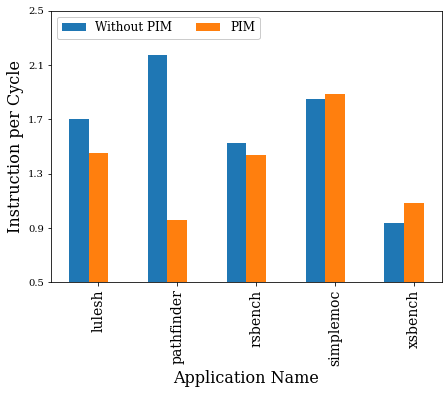

In [6]:

#------------------------------ Data processing done

import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import matplotlib.patches as mpatches



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos] + 0.05, height + 3,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize=12, rotation=90)



def average(lst):
    return sum(lst) / len(lst)



#plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)



barwidth=.25



x_pos = np.arange(len(app))  # the label locations
barwidth=.25
#barwidth=.15


# Set position of bar on X axis
r1 = np.arange(len(app))
r2 = [x + barwidth for x in r1]
#r3 = [x + barwidth for x in r2]
#r4 = [x + barwidth for x in r3]
#r5 = [x + barwidth for x in r4]

#ax.barh(x_pos, read, hatch='....', color='white', edgecolor='black')
#rects1 = plt.bar(x, traffic, .8, hatch='....', color='white', edgecolor='black')
#rects1=ax.bar(r1, t_8, width=barwidth, hatch='...', color='white', edgecolor='black', label="Tile-8x8")
#rects2=ax.bar(r2, t_16, width=barwidth, hatch='**', color='white', edgecolor='black', label="Tile-16x16")
#rects3=ax.bar(r3, t_32, width=barwidth, hatch='oo', color='cornflowerblue', edgecolor='black', label="Tile-32x32")
#rects4=ax.bar(r4, t_64, width=barwidth, hatch='uu', color='cornflowerblue', edgecolor='black', label="Tile-64x64")


print(app)
print(host_array)
print(pim_array)


rects1=ax.bar(r1, host_array, width=barwidth,  label="Without PIM")
rects2=ax.bar(r2, pim_array, width=barwidth,  label="PIM")

#rects3=ax.bar(r3, t_16, width=barwidth,  label="Tile-16x16")
#rects4=ax.bar(r4, t_32, width=barwidth, label="Tile-32x32")
#rects5=ax.bar(r5, t_64, width=barwidth, color='cornflowerblue', label="Tile-64x64")
#rects2=ax.bar(r2, lit, width=barwidth, hatch='///', color='cornflowerblue', edgecolor='black', label="MAPredict_Corrected")

plt.legend(loc="upper left", handlelength=2, fontsize=12, ncol=2, framealpha=1)

#plt.legend(loc="upper right", fontsize=12)


ax.set_ylabel('Instruction per Cycle', fontsize=16)
ax.set_xlabel('Application Name', fontsize=16)

plt.yticks(np.arange(0.5, max(host_array)+ .4, .4))
ax.set_ylim(ymin=.5)

#plt.yticks(np.arange(0, max(mapr)+90, 20), color="white")

#ax.set_yticklabels()


#plt.title('', fontsize=18)
#ax.set_xticks(x_pos)

#plt.yticks(fontsize=14)
#ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.xticks([r + barwidth for r in range(len(app))], app, fontsize=14, rotation=90)

#ax.set_yscale('log')
#ax.set_ylim(1e-1, 1e3)

#ax.invert_yaxis()
#plt.tight_layout()

plt.show()
fig.savefig('../figures/ipc.png', dpi=100)





# LFMR graph data processing 

In [7]:

new_df= df[df['type'].str.contains('LFMR')]

display(new_df)

host= new_df[new_df['app'].str.contains('host')]
pim= new_df[new_df['app'].str.contains('pim')]
display(host)
display(pim)

app_name = host['app'].str.split('_', expand=True)
display(app_name)


app = app_name[0]
host_array = host['data'].to_numpy()
pim_array = pim['data'].to_numpy()
print (app)
print (host_array)
print (pim_array)


,app,type,data
109,lulesh_host_1.txt,LFMR,0.005603
110,lulesh_pim_1.txt,LFMR,0.000000
111,pathfinder_host_1.txt,LFMR,0.002004
112,pathfinder_pim_1.txt,LFMR,0.000000
113,rsbench_host_1.txt,LFMR,0.055870
114,rsbench_pim_1.txt,LFMR,0.000000
115,simplemoc_host_1.txt,LFMR,0.700247
116,simplemoc_pim_1.txt,LFMR,0.000000
117,xsbench_host_1.txt,LFMR,0.605397
118,xsbench_pim_1.txt,LFMR,0.000000


,app,type,data
109,lulesh_host_1.txt,LFMR,0.005603
111,pathfinder_host_1.txt,LFMR,0.002004
113,rsbench_host_1.txt,LFMR,0.055870
115,simplemoc_host_1.txt,LFMR,0.700247
117,xsbench_host_1.txt,LFMR,0.605397


,app,type,data
110,lulesh_pim_1.txt,LFMR,0.0
112,pathfinder_pim_1.txt,LFMR,0.0
114,rsbench_pim_1.txt,LFMR,0.0
116,simplemoc_pim_1.txt,LFMR,0.0
118,xsbench_pim_1.txt,LFMR,0.0


,0,1,2
109,lulesh,host,1.txt
111,pathfinder,host,1.txt
113,rsbench,host,1.txt
115,simplemoc,host,1.txt
117,xsbench,host,1.txt


109        lulesh
111    pathfinder
113       rsbench
115     simplemoc
117       xsbench
Name: 0, dtype: object
[0.00560269 0.00200439 0.05586979 0.70024686 0.60539712]
[0. 0. 0. 0. 0.]


# LFMR graph creation

109        lulesh
111    pathfinder
113       rsbench
115     simplemoc
117       xsbench
Name: 0, dtype: object


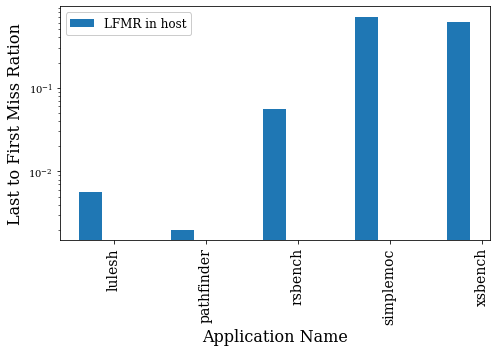

In [8]:
print(app)



#------------------------------ Data processing done

import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import matplotlib.patches as mpatches



def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos] + 0.05, height + 3,
                '{}'.format(height), ha=ha[xpos], va='bottom', fontsize=12, rotation=90)



def average(lst):
    return sum(lst) / len(lst)



#plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)



barwidth=.25



x_pos = np.arange(len(app))  # the label locations
barwidth=.25
#barwidth=.15


# Set position of bar on X axis
r1 = np.arange(len(app))
r2 = [x + barwidth for x in r1]
#r3 = [x + barwidth for x in r2]
#r4 = [x + barwidth for x in r3]
#r5 = [x + barwidth for x in r4]

#ax.barh(x_pos, read, hatch='....', color='white', edgecolor='black')
#rects1 = plt.bar(x, traffic, .8, hatch='....', color='white', edgecolor='black')
#rects1=ax.bar(r1, t_8, width=barwidth, hatch='...', color='white', edgecolor='black', label="Tile-8x8")
#rects2=ax.bar(r2, t_16, width=barwidth, hatch='**', color='white', edgecolor='black', label="Tile-16x16")
#rects3=ax.bar(r3, t_32, width=barwidth, hatch='oo', color='cornflowerblue', edgecolor='black', label="Tile-32x32")
#rects4=ax.bar(r4, t_64, width=barwidth, hatch='uu', color='cornflowerblue', edgecolor='black', label="Tile-64x64")

rects1=ax.bar(r1, host_array, width=barwidth,  label="LFMR in host")
#rects2=ax.bar(r2, pim_ipc, width=barwidth,  label="PIM")

#rects3=ax.bar(r3, t_16, width=barwidth,  label="Tile-16x16")
#rects4=ax.bar(r4, t_32, width=barwidth, label="Tile-32x32")
#rects5=ax.bar(r5, t_64, width=barwidth, color='cornflowerblue', label="Tile-64x64")
#rects2=ax.bar(r2, lit, width=barwidth, hatch='///', color='cornflowerblue', edgecolor='black', label="MAPredict_Corrected")

plt.legend(loc="upper left", handlelength=2, fontsize=12, ncol=2, framealpha=1)

#plt.legend(loc="upper right", fontsize=12)


ax.set_ylabel('Last to First Miss Ration', fontsize=16)
ax.set_xlabel('Application Name', fontsize=16)

plt.yticks(np.arange(0, max(host_array), .1))
#ax.set_ylim(ymin=.5)

#plt.yticks(np.arange(0, max(mapr)+90, 20), color="white")

#ax.set_yticklabels()


#plt.title('', fontsize=18)
#ax.set_xticks(x_pos)

#plt.yticks(fontsize=14)
#ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.xticks([r + barwidth for r in range(len(app))], app, fontsize=14, rotation=90)
#plt.xticks([r + barwidth for r in range(len(mapr))], matrix, fontsize=14, rotation=0)
#plt.xticks([r + barwidth for r in range(len(mapr))], stride, fontsize=14, rotation=90)

#plt.xticks(rotation=45, fontsize=14)

#ax.set_xticklabels(stride, fontsize=12)

#autolabel(rects1, "center")
#autolabel(rects2, "center")
#autolabel(rects3, "center")
#autolabel(rects4, "center")

ax.set_yscale('log')
#ax.set_ylim(1e-1, 1e3)

#ax.invert_yaxis()
plt.tight_layout()

plt.show()
fig.savefig('../figures/lfmr.png', dpi=100)



